Изготвил: Росица Динкова Тодинова, ф.н. 71624, специалност Информационни системи, 4 курс

# Опсиание на проекта

Целта на проекта е да предостави модел, който предсказва дали при даден пациент има риск от сърдечно заболяване в рамките на 10 години. Dataset-a, който е използван, съдържа данни, събрани от сърдечно-съдови изследвания. Той се състои от 15 атрибута и 4240 записа.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## Описание да dataset

In [2]:
heart_disease_dataset=pd.read_csv("framingham.csv")

In [3]:
heart_disease_dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Dataset-a съдържа следните колони:

CATEGORICAL DATA:
    - male (Пол): Приема стойност 0 за female и 1 за male.
    - education (Образование): Приема стойности 1 за Some High School, 2 за High School или GED, 3 за Some College или Vocational School и 4 зая College
    - currentSmoker (Пушач): Приема стойности 0 за непушач и 1 за пушач
    - BPMeds (Лекарства за кръвно налягане): Приема стойност 0 в случай, че пациентът не приема лекарства за кръвно налягане и 1 - ако приема.
    - prevalentStroke (Предишен сърдечен удар): Приема стойност 0, ако пациентът не е получавал сърдечен удар преди и 1 - ако е.
    - prevalentHyp (Свръхчувствителност): Приема стойност 0, ако пациентът не е развивал свръхчувствителност преди и 1 - ако е.
    - diabetes (Диабет): Приема стойност 0, ако пациентът няма диабет и 1 - ако има.
NUMERICAL DATA:
    - age (Години): Когато е правено изследването
    - cigsPerDay (Брой цигари на ден): Средно
    - totChol (Ниво на холестерол): Измерва се в mg/dL
    - sysBP (Систолно кръвно налягане): Горна граница на кръвно налягане. Измерва се в mmHg.
    - diaBP (Диастолно кръвно налягане): Долна граница на кръвно налягане. Измерва с в mmHg.
    - BMI - Body Mass Index (Индекс на телесната маса): Пресмята се по следната формула - Weight (kg) / Height(meter-squared)
    - heartRate (Сърдечен ритъм): Измерва се в Beats/Min
    - glucose (Глюкоза): Измерва се в mg/dL.
VALUE TO PREDICT:
    - TenYearCHD () - Стойността, която трябва да се предскаже, приема стойност 0, ако няма шанс пациентът да развие сърдечно заболяване в близките 10 години и 1 - ако има.

# Data Exploration

In [4]:
heart_disease_dataset.info();
names = list(heart_disease_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
heart_disease_dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

От тук виждаме, че има само една характеристика, която има доста липсващи стойности - glucose. Също така. всички характеристики са сведени до числа - int и float, включително и categorical данните.

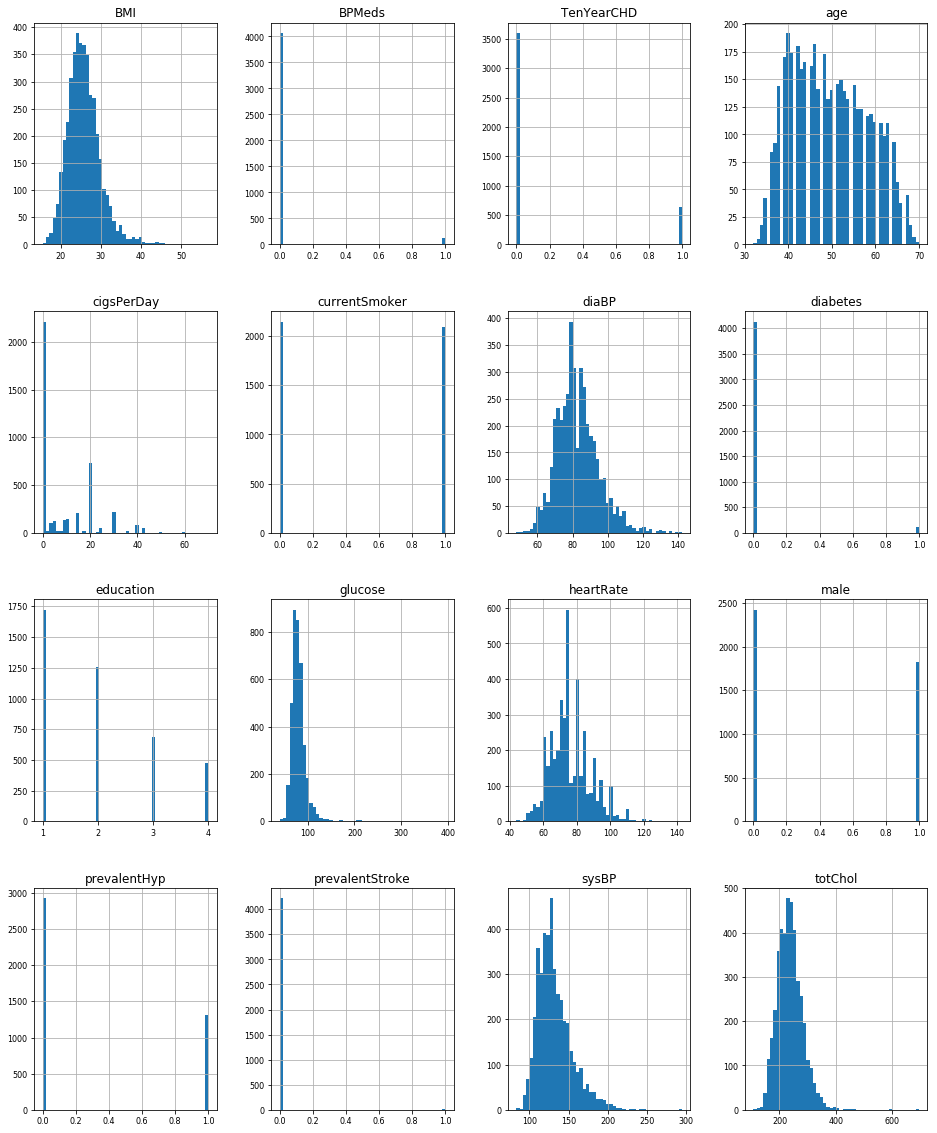

In [6]:
heart_disease_dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

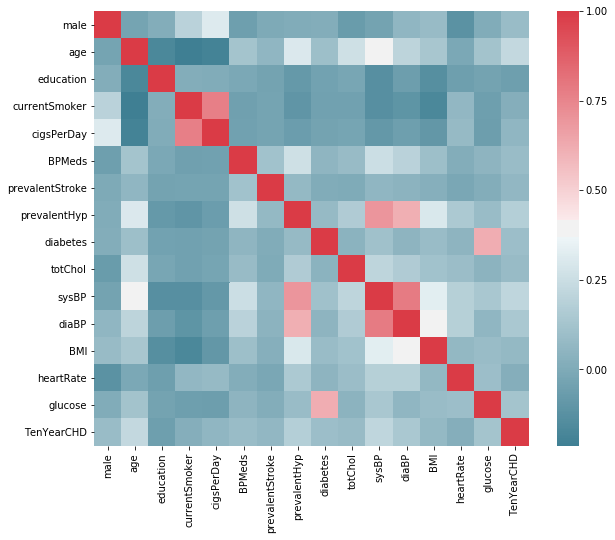

In [7]:
f, ax = plt.subplots(figsize=(10, 8))
corr = heart_disease_dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax);

In [8]:
features_correlation = heart_disease_dataset.corr()['TenYearCHD'][:-1]
golden_features_list = features_correlation[abs(features_correlation) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with TenYearCHD:\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated values with TenYearCHD:
Series([], Name: TenYearCHD, dtype: float64)


In [9]:
features_correlation = heart_disease_dataset.corr()['TenYearCHD'][:-1]
golden_features_list = features_correlation[abs(features_correlation) > 0.2].sort_values(ascending=False)
print("There are {} not very strong correlated values with TenYearCHD:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 not very strong correlated values with TenYearCHD:
age      0.225408
sysBP    0.216374
Name: TenYearCHD, dtype: float64


Най-силна корелация имаме между currentSmoker и cigsPerDay. Това, дали пациентът е развивал свръхчувствителност зависи от неговите долна и горна граница на кръвно налягане. Също така, това дали пациентът има диабет, зависи от глюкозата в кръвта му.

# Data Preparation - functions

In [10]:
def predict_empty_numerical_values(column_name):
    dataset_without_null_except = heart_disease_dataset.dropna(axis='columns')
    dataset_without_null_except = dataset_without_null_except.join(heart_disease_dataset[column_name])
    linearreg = LinearRegression()
    x_train = dataset_without_null_except[dataset_without_null_except[column_name].notnull()].drop(columns=column_name)
    y_train = dataset_without_null_except[dataset_without_null_except[column_name].notnull()][column_name]
    x_test = dataset_without_null_except[dataset_without_null_except[column_name].isnull()].drop(columns=column_name)
    y_test = dataset_without_null_except[dataset_without_null_except[column_name].isnull()][column_name]
    linearreg.fit(x_train, y_train)
    predicted = linearreg.predict(x_test)
    heart_disease_dataset[column_name][heart_disease_dataset[column_name].isnull()] = predicted

In [11]:
def predict_empty_categorical_values(column_name):
    dataset_without_null_except = heart_disease_dataset.dropna(axis='columns')
    dataset_without_null_except = dataset_without_null_except.join(heart_disease_dataset[column_name])
    logreg = LogisticRegression()
    x_train = dataset_without_null_except[dataset_without_null_except[column_name].notnull()].drop(columns=column_name)
    y_train = dataset_without_null_except[dataset_without_null_except[column_name].notnull()][column_name]
    x_test = dataset_without_null_except[dataset_without_null_except[column_name].isnull()].drop(columns=column_name)
    y_test = dataset_without_null_except[dataset_without_null_except[column_name].isnull()][column_name]
    logreg.fit(x_train, y_train)
    predicted = logreg.predict(x_test)
    heart_disease_dataset[column_name][heart_disease_dataset[column_name].isnull()] = predicted

In [12]:
numerical_data = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_data = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
for column_name in list(heart_disease_dataset):
    if any(list(pd.isnull(heart_disease_dataset[column_name]).values)) and column_name in numerical_data:
        predict_empty_numerical_values(column_name)
    if any(list(pd.isnull(heart_disease_dataset[column_name]).values)) and column_name in categorical_data:
        predict_empty_categorical_values(column_name)

In [13]:
heart_disease_dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

За да разберем дали това е правилно решение, ще опитаме и с премахване на всички features, които имат празни стойности. 

In [14]:
def clear_empty_data(heart_disease_dataset):
    heart_disease_dataset.dropna(axis=0,inplace=True)

Нека заредим още веднъж dataset-a и да премахнем редовете, които съдържат празни стойности, за да сравним с кой dataset моделите ще се държат по-добре.

In [15]:
hdd_no_empty=pd.read_csv("framingham.csv")
clear_empty_data(hdd_no_empty)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(heart_disease_dataset.iloc[:, :-1], heart_disease_dataset.iloc[:,-1], test_size=0.4, random_state=0)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(hdd_no_empty.iloc[:, :-1], hdd_no_empty.iloc[:,-1], test_size=0.4, random_state=0)

## Oversampling

In [17]:
oversampler = SMOTE(random_state=12, ratio=1.0)
X_train, y_train = oversampler.fit_sample(X_train, y_train)

In [18]:
def plot_feature_importance(importances, names):
    plt.title("Feature importances")
    indices = np.argsort(importances)
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [names[i] for i in indices])
    plt.show()

# Model building

Ще обучим няколко модела, като използваме Логистична регресия, DecisionTree класификатор, RandomForest класификатор, KNN. За да се извлече максималното от използваните алгоритми използваме hyperparameter optimization/tuning, като за целта използвам GridSearch - изпробват се всички комбинации с посочените параметри (време за кафе), както и RandomizedSearch - избират се произволни комбинации от параметри (ще я използвам за RandomForestClassifier, ExtraTreesClassifier и KNearestNeighbors); и се избира най-добрата на база оценка на модела.

## Logistic Regression

Като за начало ще намерим параметрите, с които ще можем да изсмучем максималното от модела ни - hyperparameter optimization. Ще използваме GridSearchCV, за да тестваме различни комбинации със следните параметри: C, penalty, tol.

In [19]:
parameters={"C":np.logspace(-3,3,10), "penalty":["l1","l2"], "tol":np.logspace(-3,3,10)}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,parameters,cv=10);
logreg_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",logreg_cv.best_params_)
print("Score with optimized parameters:",logreg_cv.best_score_)

Optimized hpyerparameters: {'C': 0.46415888336127775, 'tol': 0.004641588833612777, 'penalty': 'l1'}
Score with optimized parameters: 0.682093023255814


In [20]:
def train_model_with_logistic_regression(X_train, y_train, X_test, y_test, params={}):
    model = LogisticRegression(**params);
    model.fit(X_train, y_train)
    print(sorted(list(zip(map(abs, model.coef_.tolist()[0]), names)), reverse=True))
    print("Train score: " + str(model.score(X_train, y_train)))
    print("Test score: " + str(model.score(X_test, y_test)))
    return model

Да проверим какъв score ще получим върху двата dataset-a - единия със запълнените празни стойности и другия с премахнатите редове с празни стойности. Ще тестваме какъв score ще получим и с оптимизираните хиперпараметри, които получихме.

In [21]:
model_logreg = train_model_with_logistic_regression(X_train, y_train, X_test, y_test)

[(0.7245839262518234, 'prevalentStroke'), (0.6147301208657515, 'male'), (0.3793638726167513, 'prevalentHyp'), (0.18213467849660128, 'currentSmoker'), (0.08310775980187164, 'diabetes'), (0.06892633443145783, 'age'), (0.045959866960158205, 'BPMeds'), (0.015513787278413392, 'BMI'), (0.015020879617281189, 'cigsPerDay'), (0.013111742340089385, 'education'), (0.009543577152281725, 'sysBP'), (0.006128416851388123, 'glucose'), (0.0017383603507448492, 'heartRate'), (0.0013440431201377748, 'totChol'), (0.0013148429969368366, 'diaBP')]
Train score: 0.6825581395348838
Test score: 0.6851415094339622


In [22]:
train_model_with_logistic_regression(X_train_e, y_train_e, X_test_e, y_test_e)

[(0.5913158861919798, 'prevalentStroke'), (0.4730424875766562, 'prevalentHyp'), (0.40031258875085535, 'male'), (0.2089225233434471, 'BPMeds'), (0.18514603556634582, 'diabetes'), (0.09879203309216783, 'education'), (0.033882411309108726, 'age'), (0.019149590048654148, 'cigsPerDay'), (0.015424606785890476, 'sysBP'), (0.013868641355043279, 'heartRate'), (0.010460006491813832, 'diaBP'), (0.005227024725092503, 'currentSmoker'), (0.00507461589217372, 'glucose'), (0.0034446311589377736, 'BMI'), (0.0007344229707698127, 'totChol')]
Train score: 0.8600729261622607
Test score: 0.8394808743169399


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Очевидно модела ни се справя по-добре с тестовите данни от първия dataset - този със запълнените празни стойности. 

In [23]:
train_model_with_logistic_regression(X_train, y_train, X_test, y_test, logreg_cv.best_params_)

[(0.6107244941933391, 'male'), (0.39996961938273373, 'prevalentStroke'), (0.34696692676834506, 'prevalentHyp'), (0.16481948075365171, 'currentSmoker'), (0.06955540733236684, 'age'), (0.016273374130728983, 'BMI'), (0.015664397521714758, 'cigsPerDay'), (0.010090616057403143, 'sysBP'), (0.005898544797391227, 'glucose'), (0.005812465674661582, 'education'), (0.0014368191309548973, 'heartRate'), (0.0013744585664024272, 'totChol'), (0.0009720585671223284, 'diaBP'), (0.0, 'diabetes'), (0.0, 'BPMeds')]
Train score: 0.683953488372093
Test score: 0.6869103773584906


LogisticRegression(C=0.46415888336127775, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.004641588833612777, verbose=0,
          warm_start=False)

### Confusion Matrix при Logistic regression

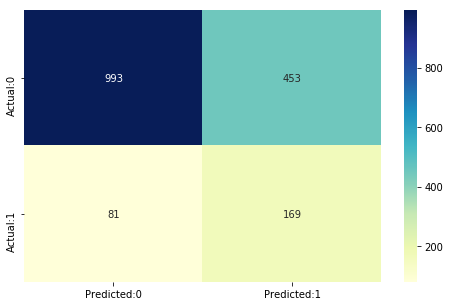

In [24]:
cm=confusion_matrix(y_test,model_logreg.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [25]:
recall = cm[0, 0] / (cm[0, 0]+cm[1, 0])
print("Recall" + str(recall))

Recall0.9245810055865922


Както се вижда от матрицата, моделът ни се справя добре при предсказване, че пациента няма шанс от сърдечно заболяване в близките 10 години, когато наистина е така. Проблемът е при предсказване, че пациентът има шанс за сърдечно заболяване. Само в 14 от случаите, моделът е познал, че пациентът има шанс за сърдечно заболяване в близките 10 години. В останалите 236 случаи е объркал, което е фатално в този случай (по-добре да предскажем на здрав човек, че е болен, отколкото обратното). Това се дължи на използването на логистична регресия. Както видяхме в heatmap-a, стойността, която предсказваме не е много зависима от останалите характеристики и за това в случая логистичната регресия не ни върши много добра работа. Приличният score се дължи на това, че доста голяма част от данните в dataset-a показват, че пациент няма шанс за сърдечни заболявания в близките 10 години.

## Decision Tree Classification

При Decision Tree Classification отново ще направим hyperparameter optimization и ще обучим и тестваме модела.

In [26]:
parameters={"criterion":["gini", "entropy"], "splitter":["best","random"], "max_depth": range(1, 110, 10)}
dtree=DecisionTreeClassifier()
dtree_cv=GridSearchCV(dtree,parameters,cv=10);
dtree_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",dtree_cv.best_params_)
print("Score with optimized parameters:",dtree_cv.best_score_)

Optimized hpyerparameters: {'criterion': 'gini', 'max_depth': 81, 'splitter': 'random'}
Score with optimized parameters: 0.8486046511627907


In [27]:
def train_model_with_decision_tree(X_train, y_train, X_test, y_test, params={}):
    model = DecisionTreeClassifier(**params).fit(X_train,y_train)
    print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), reverse=True))
    plot_feature_importance(model.feature_importances_, names)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model

[(0.1978, 'male'), (0.186, 'age'), (0.08, 'glucose'), (0.0784, 'prevalentHyp'), (0.0782, 'sysBP'), (0.0769, 'heartRate'), (0.0723, 'totChol'), (0.0605, 'BMI'), (0.0482, 'education'), (0.0447, 'currentSmoker'), (0.0437, 'diaBP'), (0.0235, 'cigsPerDay'), (0.0035, 'prevalentStroke'), (0.0032, 'BPMeds'), (0.0031, 'diabetes')]


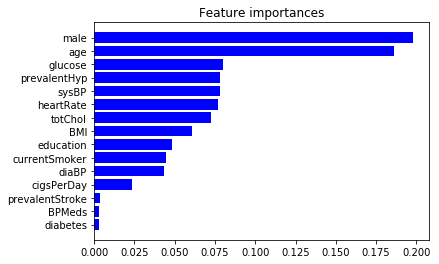

Train score: 0.8237209302325581
Test score: 0.7570640291514836


In [28]:
model_dt = train_model_with_decision_tree(X_train, y_train, X_test, y_test)

[(0.1734, 'sysBP'), (0.1582, 'BMI'), (0.1448, 'glucose'), (0.1285, 'totChol'), (0.1108, 'diaBP'), (0.0958, 'heartRate'), (0.0824, 'age'), (0.0382, 'cigsPerDay'), (0.0245, 'male'), (0.0148, 'education'), (0.0088, 'prevalentHyp'), (0.007, 'BPMeds'), (0.0063, 'prevalentStroke'), (0.004, 'diabetes'), (0.0025, 'currentSmoker')]


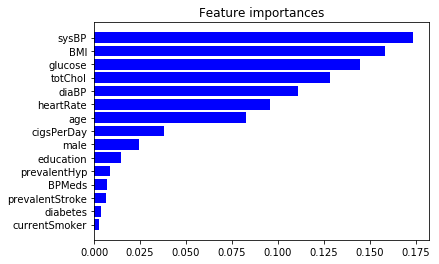

Train score: 0.7607092943980952
Test score: 0.7582191780821919


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
train_model_with_decision_tree(X_train_e, y_train_e, X_test_e, y_test_e)

[(0.1688, 'prevalentHyp'), (0.1461, 'male'), (0.1222, 'age'), (0.0774, 'diaBP'), (0.0687, 'education'), (0.0674, 'BMI'), (0.0662, 'sysBP'), (0.0658, 'totChol'), (0.0584, 'glucose'), (0.0535, 'heartRate'), (0.0505, 'currentSmoker'), (0.0332, 'cigsPerDay'), (0.0076, 'diabetes'), (0.0076, 'BPMeds'), (0.0066, 'prevalentStroke')]


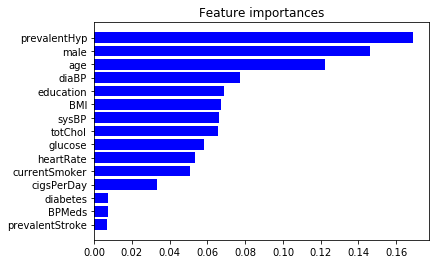

Train score: 0.8265116279069769
Test score: 0.7553097345132743


In [30]:
model_dt_opt = train_model_with_decision_tree(X_train, y_train, X_test, y_test, dtree_cv.best_params_)

## Confusion matrix при Decision Tree Classification

Нека погледнем confusion матриците, когато не използваме hyperparameter optimization и когато - да. 

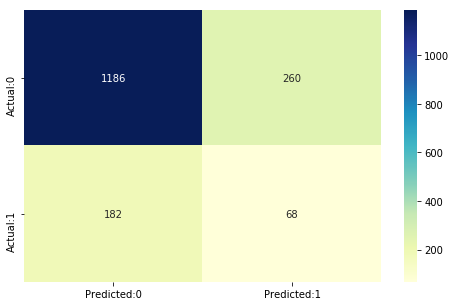

In [31]:
cm=confusion_matrix(y_test, model_dt.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

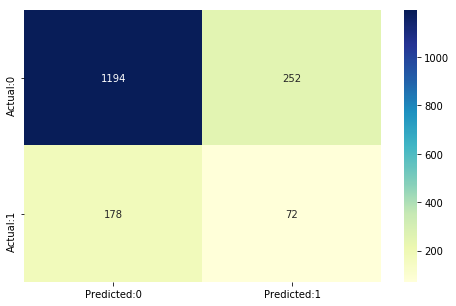

In [32]:
cm=confusion_matrix(y_test, model_dt_opt.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

В първия случай имаме подобрение в сравнение с използването на логистична регресия. Въпреки че моделът ни е определил за малко повече хора, че потенциално са застрашени от сърдечни заболявания, а това не е така, той е успял да предскаже за 70 човека, че имат шанс за сърдечно заболяване и е познал. Вече споменахме, че предпочитаме моделът ни да каже на здравия болен, отколкото на болния - здрав. За това, въпреки ниският score, имаме напредък. 
Странното тук е confusion матрицата при използване на hyperparameter optimization. С цел постигане на по-висок score, параметрите са така избрани, че моделът ни вече предсказва за всички, че нямат шанс от сърдечно заболяване.

## Random Forest Classification

При Random Forest Classification, за оптимизиране на хиперпараметрите, ще използваме методът RandomizedSearch, тъй като всевъзможните комбинации на избраните параметри са много и времето за изпробване и сравняване на всички е доста. Този метод не дава гаранция, че ще намери най-добрите параметри.

In [33]:
parameters={"n_estimators": range(1, 201, 10), "max_features":["auto","sqrt"], "max_depth":range(1, 101, 10), "min_samples_split":range(2,10,1), "min_samples_leaf":[1, 2, 4], "bootstrap":[True, False]}
rforest=RandomForestClassifier()
rforest_cv=RandomizedSearchCV(rforest,parameters,cv=10);
rforest_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",rforest_cv.best_params_)
print("Score with optimized parameters:",rforest_cv.best_score_)

Optimized hpyerparameters: {'n_estimators': 101, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False, 'max_depth': 31}
Score with optimized parameters: 0.9148837209302325


In [34]:
def train_model_with_random_forest(X_train, y_train, X_test, y_test, params={}):
    model = RandomForestClassifier(**params).fit(X_train,y_train);
    print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), reverse=True))
    plot_feature_importance(model.feature_importances_, names)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model

[(0.1357, 'age'), (0.109, 'male'), (0.0964, 'sysBP'), (0.0891, 'prevalentHyp'), (0.088, 'totChol'), (0.082, 'glucose'), (0.0759, 'diaBP'), (0.0755, 'BMI'), (0.0736, 'heartRate'), (0.0639, 'education'), (0.0523, 'cigsPerDay'), (0.0434, 'currentSmoker'), (0.0078, 'BPMeds'), (0.0046, 'diabetes'), (0.0027, 'prevalentStroke')]


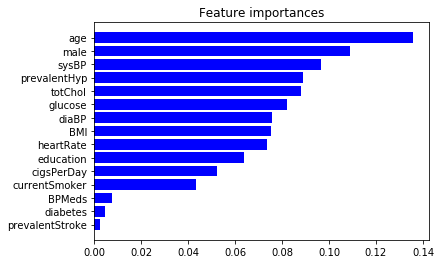

Train score: 0.8776744186046512
Test score: 0.8496477529064723


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
train_model_with_random_forest(X_train, y_train, X_test, y_test)

[(0.139, 'diaBP'), (0.1365, 'BMI'), (0.1307, 'sysBP'), (0.1208, 'totChol'), (0.1163, 'glucose'), (0.1067, 'age'), (0.0881, 'heartRate'), (0.0608, 'cigsPerDay'), (0.0359, 'education'), (0.0205, 'male'), (0.0188, 'prevalentHyp'), (0.0108, 'currentSmoker'), (0.0089, 'BPMeds'), (0.0048, 'diabetes'), (0.0013, 'prevalentStroke')]


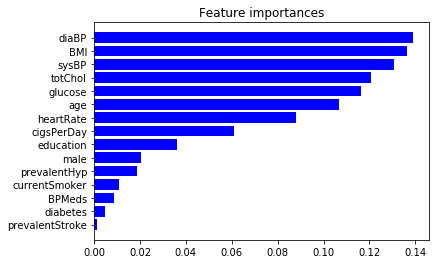

Train score: 0.8495852020375377
Test score: 0.8196713263827201


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
train_model_with_random_forest(X_train_e, y_train_e, X_test_e, y_test_e)

[(0.1427, 'age'), (0.1312, 'male'), (0.0895, 'sysBP'), (0.0888, 'prevalentHyp'), (0.0817, 'education'), (0.0815, 'totChol'), (0.0703, 'glucose'), (0.0703, 'diaBP'), (0.0669, 'BMI'), (0.0665, 'heartRate'), (0.049, 'cigsPerDay'), (0.0447, 'currentSmoker'), (0.0084, 'BPMeds'), (0.0057, 'diabetes'), (0.0027, 'prevalentStroke')]


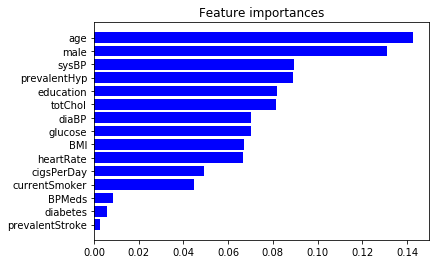

Train score: 0.9051162790697674
Test score: 0.8384556654520214


In [37]:
model_rf_opt = train_model_with_random_forest(X_train, y_train, X_test, y_test, rforest_cv.best_params_)

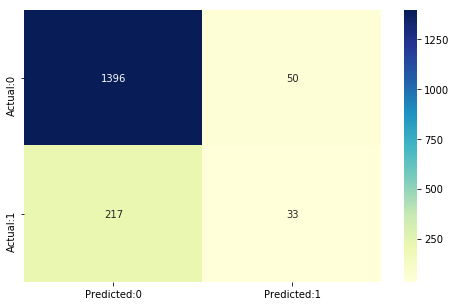

In [38]:
cm=confusion_matrix(y_test, model_rf_opt.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Extra Trees Classification

In [39]:
parameters={"n_estimators": range(1, 201, 10), "max_features":["auto","sqrt"], "max_depth":range(1, 101, 10), "min_samples_split":range(2,10,1), "min_samples_leaf":[1, 2, 4], "bootstrap":[True, False], "random_state":[42,43,44]}
extra_trees=ExtraTreesClassifier()
extra_trees_cv=RandomizedSearchCV(extra_trees,parameters,cv=10);
extra_trees_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:",extra_trees_cv.best_params_)
print("Score with optimized parameters:",extra_trees_cv.best_score_)

Optimized hpyerparameters: {'n_estimators': 181, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'auto', 'bootstrap': False, 'max_depth': 51, 'random_state': 42}
Score with optimized parameters: 0.9146511627906977


In [40]:
def train_model_with_extra_trees(X_train, y_train, X_test, y_test, params={}):
    model = ExtraTreesClassifier(**params)
    model.fit(X_train, y_train)
    print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), names), reverse=True))
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model

In [41]:
train_model_with_extra_trees(X_train, y_train, X_test, y_test)

[(0.1385, 'male'), (0.1197, 'age'), (0.0931, 'sysBP'), (0.0822, 'prevalentHyp'), (0.0809, 'totChol'), (0.0808, 'education'), (0.0701, 'diaBP'), (0.0698, 'heartRate'), (0.0692, 'glucose'), (0.0677, 'BMI'), (0.0521, 'cigsPerDay'), (0.0463, 'currentSmoker'), (0.0138, 'BPMeds'), (0.0106, 'diabetes'), (0.0052, 'prevalentStroke')]
Train score: 0.9104651162790697
Test score: 0.8425750477182022


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [42]:
train_model_with_extra_trees(X_train_e, y_train_e, X_test_e, y_test_e)

[(0.1366, 'sysBP'), (0.1193, 'age'), (0.1162, 'diaBP'), (0.113, 'heartRate'), (0.1124, 'glucose'), (0.1104, 'BMI'), (0.1039, 'totChol'), (0.0548, 'cigsPerDay'), (0.0536, 'education'), (0.0219, 'prevalentHyp'), (0.0194, 'currentSmoker'), (0.0184, 'male'), (0.0104, 'BPMeds'), (0.0066, 'diabetes'), (0.0032, 'prevalentStroke')]
Train score: 0.8454963732245536
Test score: 0.819002758427229


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
model_et_opt = train_model_with_extra_trees(X_train, y_train, X_test, y_test, extra_trees_cv.best_params_)

[(0.1721, 'male'), (0.1344, 'age'), (0.1205, 'prevalentHyp'), (0.086, 'education'), (0.0752, 'sysBP'), (0.0606, 'currentSmoker'), (0.0597, 'totChol'), (0.0548, 'diaBP'), (0.0535, 'glucose'), (0.0521, 'heartRate'), (0.0493, 'BMI'), (0.0492, 'cigsPerDay'), (0.0145, 'BPMeds'), (0.0116, 'diabetes'), (0.0065, 'prevalentStroke')]
Train score: 0.9090697674418605
Test score: 0.8514176644108972


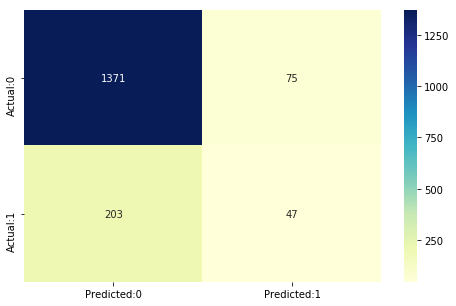

In [44]:
cm=confusion_matrix(y_test, model_et_opt.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## KNeighbors Classification

In [45]:
parameters={"n_neighbors": range(1, 201, 10), "algorithm":["auto", "ball_tree", "kd_tree", "brute"], "leaf_size":range(1, 101, 10)}
knn=KNeighborsClassifier()
knn_cv=RandomizedSearchCV(knn,parameters,cv=10);
knn_cv.fit(X_train,y_train);

print("Optimized hpyerparameters:", knn_cv.best_params_)
print("Score with optimized parameters:", knn_cv.best_score_)

Optimized hpyerparameters: {'n_neighbors': 11, 'leaf_size': 61, 'algorithm': 'ball_tree'}
Score with optimized parameters: 0.7788372093023256


In [46]:
def train_model_with_knn(X_train, y_train, X_test, y_test, params={}):
    model = KNeighborsClassifier(**params)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Train score: " + str(scores.mean()))
    scores = cross_val_score(model, X_test, y_test, cv=5)
    print("Test score: " + str(scores.mean()))
    return model

In [47]:
model_knn = train_model_with_knn(X_train, y_train, X_test, y_test)

Train score: 0.813953488372093
Test score: 0.8354988721152179


In [48]:
train_model_with_knn(X_train, y_train, X_test, y_test, knn_cv.best_params_)

Train score: 0.7755813953488373
Test score: 0.8490577824049975


KNeighborsClassifier(algorithm='ball_tree', leaf_size=61, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

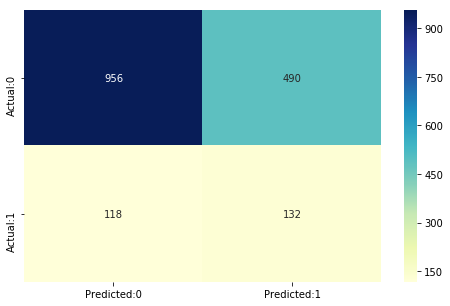

In [49]:
cm=confusion_matrix(y_test, model_knn.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Voting Classification

Сега ще комбинирам различни модели, за да получим по-добър резултат. За целта ще използвам VotingClassifier от scikit-learn.

In [52]:
eclf2 = VotingClassifier(estimators=[('dt', model_dt), ('dto', model_dt_opt)], voting='hard')
eclf2 = eclf2.fit(X_train, y_train)

for classifier, label in zip([model_dt, model_dt_opt, eclf2], ['Decision Tree', 'Decision Tree Optimized', 'Ensemble']):
    scores = cross_val_score(classifier, X_train, y_train, cv=10)
    print("Score with %s: %0.3f" % (label, scores.mean()))

Score with Decision Tree: 0.833
Score with Decision Tree Optimized: 0.838
Score with Ensemble: 0.863


In [53]:
eclf1 = VotingClassifier(estimators=[('lr', model_logreg), ('rf', model_rf_opt), ('dt', model_dt)], voting='hard')
eclf1 = eclf1.fit(X_train, y_train)

for classifier, label in zip([model_rf_opt, model_dt, model_logreg, eclf1], ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Ensemble']):
    scores = cross_val_score(classifier, X_train, y_train, cv=10)
    print("Score with %s: %0.3f" % (label, scores.mean()))

Score with Random Forest: 0.913
Score with Decision Tree: 0.833
Score with Logistic Regression: 0.681
Score with Ensemble: 0.877


In [51]:
for clf in [model_logreg, model_rf_opt, model_dt]:
    vanilla_scores = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=42)
    bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=10, 
       n_jobs=-1)
    
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__, vanilla_scores.mean(), vanilla_scores.std()))
    print("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__, bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.681, std: (+/-) 0.021 [LogisticRegression]
Mean of: 0.673, std: (+/-) 0.019 [Bagging LogisticRegression]

Mean of: 0.916, std: (+/-) 0.105 [RandomForestClassifier]
Mean of: 0.891, std: (+/-) 0.114 [Bagging RandomForestClassifier]

Mean of: 0.836, std: (+/-) 0.091 [DecisionTreeClassifier]
Mean of: 0.862, std: (+/-) 0.120 [Bagging DecisionTreeClassifier]

